In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations

file_path = '/content/test-dataset.xlsx'
dataset = pd.read_excel(file_path)
dataset.head()

def is_categorical(series, threshold=10):
    return series.nunique() < threshold or series.dtype.name == "category"

def interpret_p_value(p_val):
    return "Significant" if p_val < 0.05 else "Not Significant"

def chi_square_test(data, var1, var2):
    table = pd.crosstab(data[var1], data[var2])
    if table.size == 0 or np.any(table.sum(axis=0) == 0) or np.any(table.sum(axis=1) == 0):
        return None, None, None, "Invalid Test (Empty or Zero Row/Column)"
    chi2_stat, p_val, dof, _ = chi2_contingency(table)
    return chi2_stat, p_val, dof, interpret_p_value(p_val)

categorical_columns = [col for col in dataset.columns if is_categorical(dataset[col])]

categorical_pairs = list(combinations(categorical_columns, 2))

results_df = pd.DataFrame(columns=["Feature 1", "Feature 2", "Chi-square Statistic", "P-value", "Degrees of Freedom", "Interpretation"])

for pair in categorical_pairs:
    feature1, feature2 = pair
    chi2_stat, p_val, dof, interpretation = chi_square_test(dataset, feature1, feature2)
    if chi2_stat is not None:
        new_row = pd.DataFrame({
            "Feature 1": [feature1],
            "Feature 2": [feature2],
            "Chi-square Statistic": [chi2_stat],
            "P-value": [p_val],
            "Degrees of Freedom": [dof],
            "Interpretation": [interpretation]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df.head()

significant_results = results_df[results_df['Interpretation'] == 'Significant']
significant_results.reset_index(drop=True)


,Feature 1,Feature 2,Chi-square Statistic,P-value,Degrees of Freedom,Interpretation
0,total_income,is_freedom_fighter,14.214156,2.627679e-03,3,Significant
1,total_income,diabetic,38.433059,2.288488e-08,3,Significant
2,total_income,profile_hypertensive,9.958818,1.891946e-02,3,Significant
3,total_income,RESULT_STAT_BP,159.239608,1.173648e-24,18,Significant
4,total_income,RESULT_STAT_BMI,45.668069,6.003162e-05,15,Significant
5,total_income,TAG_NAME,14.035484,2.924229e-02,6,Significant
6,total_income,RESULT_STAT_SUGAR,33.876211,1.304617e-02,18,Significant
7,total_income,RESULT_STAT_PR,38.247122,1.005064e-06,6,Significant
8,total_income,RESULT_STAT_SPO2,12.897644,4.469047e-02,6,Significant
9,gender,is_freedom_fighter,4.402061,3.589552e-02,1,Significant


In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations


file_path = '/content/test-dataset.xlsx'
dataset = pd.read_excel(file_path)
dataset.head()

def is_categorical(series, threshold=10):
    return series.nunique() < threshold or series.dtype.name == "category"

def interpret_p_value(p_val):
    return "Significant" if p_val < 0.05 else "Not Significant"

def chi_square_test(data, var1, var2):
    table = pd.crosstab(data[var1], data[var2])
    if table.size == 0 or np.any(table.sum(axis=0) == 0) or np.any(table.sum(axis=1) == 0):
        return None, None, None, "Invalid Test (Empty or Zero Row/Column)"
    chi2_stat, p_val, dof, _ = chi2_contingency(table)
    return chi2_stat, p_val, dof, interpret_p_value(p_val)

categorical_columns = [col for col in dataset.columns if is_categorical(dataset[col])]

categorical_pairs = list(combinations(categorical_columns, 2))

results_df = pd.DataFrame(columns=["Feature 1", "Feature 2", "Chi-square Statistic", "P-value", "Degrees of Freedom", "Interpretation"])

for pair in categorical_pairs:
    feature1, feature2 = pair
    chi2_stat, p_val, dof, interpretation = chi_square_test(dataset, feature1, feature2)
    if chi2_stat is not None:
        new_row = pd.DataFrame({
            "Feature 1": [feature1],
            "Feature 2": [feature2],
            "Chi-square Statistic": [chi2_stat],
            "P-value": [p_val],
            "Degrees of Freedom": [dof],
            "Interpretation": [interpretation]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(results_df)


,Feature 1,Feature 2,Chi-square Statistic,P-value,Degrees of Freedom,Interpretation
0,total_income,gender,1.189601,7.554994e-01,3,Not Significant
1,total_income,is_poor,0.000000,1.000000e+00,0,Not Significant
2,total_income,is_freedom_fighter,14.214156,2.627679e-03,3,Significant
3,total_income,had_stroke,0.900317,8.253513e-01,3,Not Significant
4,total_income,has_cardiovascular_disease,4.929155,1.770589e-01,3,Not Significant
5,total_income,disabilities_name,8.481028,9.030546e-01,15,Not Significant
6,total_income,diabetic,38.433059,2.288488e-08,3,Significant
7,total_income,profile_hypertensive,9.958818,1.891946e-02,3,Significant
8,total_income,RESULT_STAT_BP,159.239608,1.173648e-24,18,Significant
9,total_income,RESULT_STAT_BMI,45.668069,6.003162e-05,15,Significant


In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations

file_path = '/content/test-dataset.xlsx'
dataset = pd.read_excel(file_path)
dataset.head()

def is_categorical(series, threshold=10):
    return series.nunique() < threshold or series.dtype.name == "category"

def interpret_p_value(p_val):
    return "Significant" if p_val < 0.05 else "Not Significant"

def chi_square_test(data, var1, var2):
    table = pd.crosstab(data[var1], data[var2])
    if table.size == 0 or np.any(table.sum(axis=0) == 0) or np.any(table.sum(axis=1) == 0):
        return None, None, None, "Invalid Test (Empty or Zero Row/Column)"
    chi2_stat, p_val, dof, _ = chi2_contingency(table)
    return chi2_stat, p_val, dof, interpret_p_value(p_val)


categorical_columns = [col for col in dataset.columns if is_categorical(dataset[col])]

categorical_pairs = list(combinations(categorical_columns, 2))

significant_df = pd.DataFrame(columns=["Feature 1", "Feature 2", "Chi-square Statistic", "P-value", "Degrees of Freedom", "Interpretation"])
non_significant_df = pd.DataFrame(columns=["Feature 1", "Feature 2", "Chi-square Statistic", "P-value", "Degrees of Freedom", "Interpretation"])

for pair in categorical_pairs:
    feature1, feature2 = pair
    chi2_stat, p_val, dof, interpretation = chi_square_test(dataset, feature1, feature2)
    if chi2_stat is not None:
        new_row = pd.DataFrame({
            "Feature 1": [feature1],
            "Feature 2": [feature2],
            "Chi-square Statistic": [chi2_stat],
            "P-value": [p_val],
            "Degrees of Freedom": [dof],
            "Interpretation": [interpretation]
        })
        if interpretation == "Significant":
            significant_df = pd.concat([significant_df, new_row], ignore_index=True)
        else:
            non_significant_df = pd.concat([non_significant_df, new_row], ignore_index=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Significant Results:")
    display(significant_df)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Non-Significant Results:")
    display(non_significant_df)


Significant Results:


,Feature 1,Feature 2,Chi-square Statistic,P-value,Degrees of Freedom,Interpretation
0,total_income,is_freedom_fighter,14.214156,2.627679e-03,3,Significant
1,total_income,diabetic,38.433059,2.288488e-08,3,Significant
2,total_income,profile_hypertensive,9.958818,1.891946e-02,3,Significant
3,total_income,RESULT_STAT_BP,159.239608,1.173648e-24,18,Significant
4,total_income,RESULT_STAT_BMI,45.668069,6.003162e-05,15,Significant
5,total_income,TAG_NAME,14.035484,2.924229e-02,6,Significant
6,total_income,RESULT_STAT_SUGAR,33.876211,1.304617e-02,18,Significant
7,total_income,RESULT_STAT_PR,38.247122,1.005064e-06,6,Significant
8,total_income,RESULT_STAT_SPO2,12.897644,4.469047e-02,6,Significant
9,gender,is_freedom_fighter,4.402061,3.589552e-02,1,Significant


Non-Significant Results:


,Feature 1,Feature 2,Chi-square Statistic,P-value,Degrees of Freedom,Interpretation
0,total_income,gender,1.189601,0.755499,3,Not Significant
1,total_income,is_poor,0.000000,1.000000,0,Not Significant
2,total_income,had_stroke,0.900317,0.825351,3,Not Significant
3,total_income,has_cardiovascular_disease,4.929155,0.177059,3,Not Significant
4,total_income,disabilities_name,8.481028,0.903055,15,Not Significant
5,total_income,RESULT_STAT_MUAC,0.164700,0.920950,2,Not Significant
6,gender,is_poor,0.000000,1.000000,0,Not Significant
7,gender,has_cardiovascular_disease,0.117574,0.731681,1,Not Significant
8,gender,disabilities_name,5.837379,0.322366,5,Not Significant
9,gender,diabetic,1.174407,0.278498,1,Not Significant


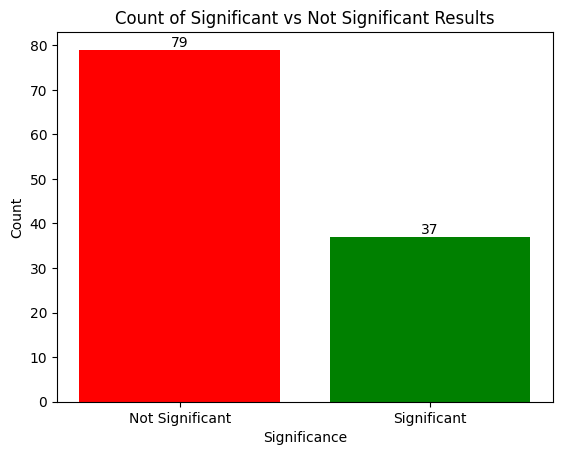

In [ ]:
import matplotlib.pyplot as plt

categories = ['Not Significant', 'Significant']
counts = [79, 37]

plt.bar(categories, counts, color=['red', 'green'])

for i in range(len(counts)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.title('Count of Significant vs Not Significant Results')
plt.xlabel('Significance')
plt.ylabel('Count')

plt.show()
